<a href="https://colab.research.google.com/github/ParsaMohammadpour/multiplication-algorithms/blob/main/matric_multiplication_comparison_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from random import randint
import time
import matplotlib.pyplot as plt
import math
import timeit

In [ ]:
class Comparator():
    def __init__(self, func_list: list[callable([[list[list[int]], list[list[int]]], list[list[int]]])], size_pows:list[int]=list(range(9)), repetition: int=1):
        self.func_list = func_list
        self.size_pows = size_pows
        self.input_list = self.generate_random_inputs()
        self.df = self.generate_df(self.func_list)
        self.repetition = repetition if repetition > 0 else 1

    def generate_random_inputs(self) -> list[list[int]]:
        res = []
        for i in self.size_pows:
            size = 2 ** i
            a = np.array([[randint(1000000, 10000000) for j in range(size)] for i in range(size)])
            b = np.array([[randint(1000000, 10000000) for j in range(size)] for i in range(size)])
            res.append([a, b])
        return res

    def generate_df(self, func_list: list[callable([[list[list[int]], list[list[int]]], list[list[int]]])]) -> pd.DataFrame:
        func_names = []
        for func in func_list:
            func_names.append(func.__name__)
        df = pd.DataFrame(columns=[*func_names, 'description'])
        return df

    # private method for calling each function with inputs
    def __call_func(self, func: list[callable([[list[list[int]], list[list[int]]], list[list[int]]])], inputs:list[int]) -> float:
        start = time.time_ns()
        for i in range(self.repetition):
            func(*inputs)
        end = time.time_ns()
        return (end - start) / 3

    def simple_bar_plot(self):
        ax = self.df.plot.bar(rot=0)
        ax.set_xlabel('row & col size')
        ax.set_ylabel('time(micro sec)')
        plt.plot()

    def comparison_subplot(self):
        axes = self.df.plot.bar(rot=0, subplots=True)
        axes[1].legend(loc=2)
        plt.plot()

    def compare(self, draw_plot: bool=True) -> pd.DataFrame:
        for func_input in self.input_list:
            call_results = []
            for func in self.func_list:
                call_results.append(self.__call_func(func, func_input))
            self.df.loc[len(self.df)] = [*call_results, f'size={len(func_input[0])}']
        if draw_plot:
            self.simple_bar_plot()
            self.comparison_subplot()
        return self.df

In [ ]:
def check_matric_degrees(a: list[list[int]], b: list[list[int]]) -> bool:
    a_row = len(a)
    b_row = len(b)
    if a_row == 0 or b_row == 0:
        return False

    a_col = len(a[0])
    b_col = len(b[0])
    for i in a:
        if len(i) != a_col:
            return False
    for i in b:
        if len(i) != b_col:
            return False

    if a_col != b_row:
        return False
    return True

In [ ]:
def mul_matric_simple(a: list[list[int]], b: list[list[int]]) -> list[list[int]]:
    res = np.zeros((len(a), len(b[0])), dtype=int)
    for i in range(len(a)):
        for j in range(len(b[0])):
            for k in range(len(a[0])):
                res[i][j] += a[i][k] * b[k][j]
    return res
mul_matric_simple([[1, 1], [0, 0]], [[1, 1], [0, 0]])

array([[1, 1],
       [0, 0]])

In [ ]:
def split(a:list[list[int]]) -> list[list[int]]:
    row, col = a.shape
    row_half, col_half = row // 2, col // 2
    A = a[:row_half, :col_half]
    B = a[:row_half, col_half:]
    C = a[row_half:, :col_half]
    D = a[row_half:, col_half:]
    return A, B, C, D

def mul_matric_strassen(x: list[list[int]], y: list[list[int]]) -> list[list[int]]:
    if len(x) <= 2:
        return np.dot(x, y)

    x_row, x_col = x.shape
    y_row, y_col = y.shape

    a, b, c, d = split(x)
    e, f, g, h = split(y)

    p1 = mul_matric_strassen(a, f - h)
    p2 = mul_matric_strassen(a + b, h)
    p3 = mul_matric_strassen(c + d, e)
    p4 = mul_matric_strassen(d, g - e)
    p5 = mul_matric_strassen(a + d, e + h)
    p6 = mul_matric_strassen(b - d, g + h)
    p7 = mul_matric_strassen(a - c, e + f)

    c11 = p5 + p4 - p2 + p6
    c12 = p1 + p2
    c21 = p3 + p4
    c22 = p1 + p5 - p3 - p7

    res1 = np.concatenate((c11, c12), axis=1)
    res2 = np.concatenate((c21, c22), axis=1)
    res = np.concatenate((res1, res2), axis=0)

    return res

mul_matric_strassen(np.array([[1, 1], [0, 0]]), np.array([[1, 1], [0, 0]]))

array([[1, 1],
       [0, 0]])

In [ ]:
size = 64
for i in range(10):
    a, b = np.random.randint(0, 100, size=(size, size), dtype=int), np.random.randint(0, 100, size=(size, size), dtype=int)
    if not np. array_equal(mul_matric_strassen(a, b), mul_matric_simple(a, b)):
        print('a: ', a)
        print('b: ', b)

,mul_matric_simple,mul_matric_strassen,description
0,1.666300e+06,1.000533e+06,size=16
1,1.112463e+07,5.208433e+06,size=32
2,1.023341e+08,4.166603e+07,size=64
3,6.336311e+08,2.672643e+08,size=128


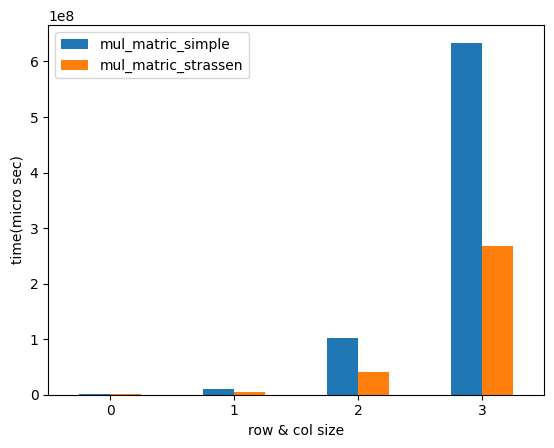

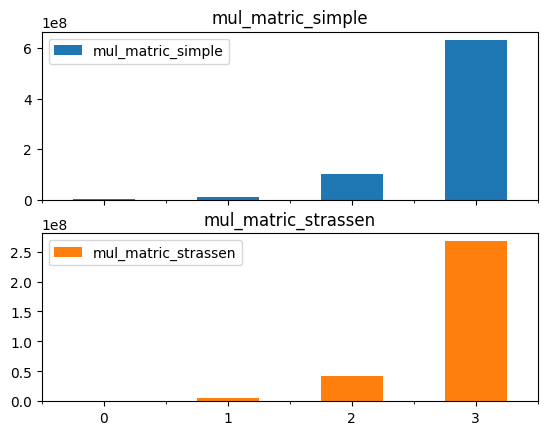

In [ ]:
comp = Comparator([mul_matric_simple, mul_matric_strassen], size_pows=list(range(4, 8)))
comp.compare()

,mul_matric_simple,mul_matric_strassen,description
0,0.000000e+00,0.000000e+00,size=1
1,0.000000e+00,0.000000e+00,size=2
2,0.000000e+00,0.000000e+00,size=4
3,0.000000e+00,5.208600e+06,size=8
4,0.000000e+00,0.000000e+00,size=16
5,1.041730e+07,5.207700e+06,size=32
6,8.285397e+07,3.899200e+07,size=64
7,6.498678e+08,2.678536e+08,size=128
8,5.160310e+09,1.886800e+09,size=256
9,4.215025e+10,1.318736e+10,size=512


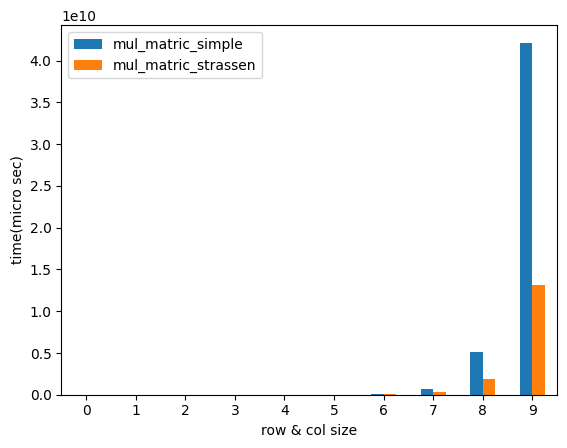

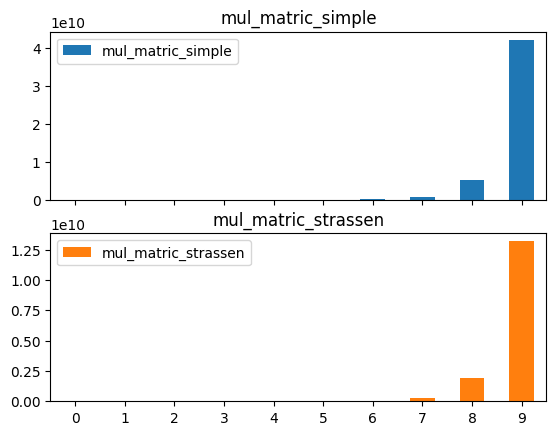

In [ ]:
comp = Comparator([mul_matric_simple, mul_matric_strassen], size_pows=list(range(10)))
comp.compare()